# Linear Discriminant Analysis (LDA)

In [1]:
# Chargement de la base
import numpy as np 
import pandas as pd
import plotnine as pn

D = pd.read_excel("./data/Data_Illustration_Livre_ADL.xlsx",sheet_name="DATA_1",header=0)
D

,Groupe,X1,X2
0,g1,0,3
1,g1,2,1
2,g1,4,6
3,g1,6,9
4,g1,8,7
5,g2,5,2
6,g2,7,0
7,g2,9,4
8,g2,11,8
9,g2,13,6


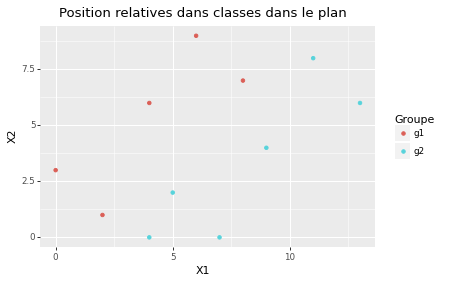

In [2]:
# Représentation graphique
p = pn.ggplot(D,pn.aes(x="X1",y="X2"))+pn.geom_point(pn.aes(color="Groupe"))+pn.ggtitle("Position relatives dans classes dans le plan")
print(p)

In [3]:
from scientisttools.discriminant_analysis import LDA

## Distribution multinomiale

In [4]:
lda = LDA(features_labels=["X1","X2"],
          target=["Groupe"],
          distribution="multinomiale",
          row_labels=D.index)
lda.fit(D)

LDA(distribution='multinomiale', features_labels=['X1', 'X2'],
    row_labels=RangeIndex(start=0, stop=11, step=1), target=['Groupe'])

In [5]:
# Moyennes conditionnelles
g_k = lda.gmean_
g_k

,X1,X2
Groupe,,
g1,4.000000,5.200000
g2,8.166667,3.333333


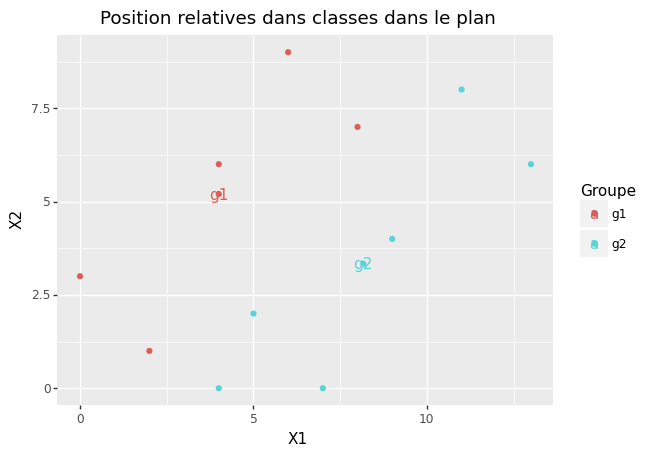

In [6]:
p = p+ pn.geom_point(g_k,pn.aes(x="X1",y="X2",color=g_k.index))+pn.geom_text(g_k,pn.aes(x="X1",y="X2",label=g_k.index,color=g_k.index))
print(p)

In [7]:
lda.gcov_

X1         X2
Groupe                         
g1     X1  10.000000   8.000000
       X2   8.000000  10.200000
g2     X1  12.166667   9.733333
       X2   9.733333  10.666667

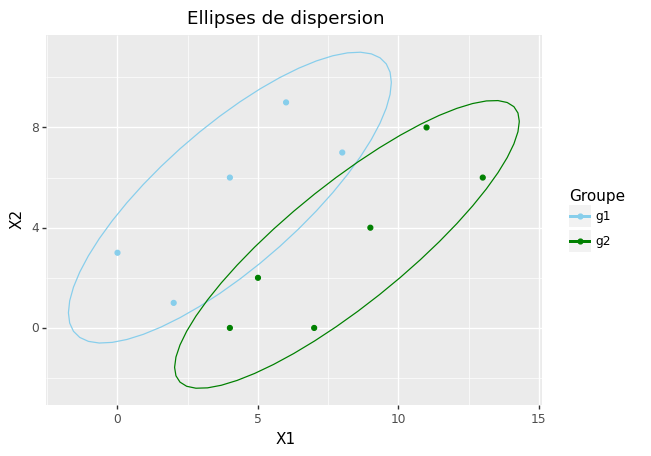

In [8]:
p2 = (pn.ggplot(D,pn.aes(x="X1",y="X2",color="Groupe"))+
      pn.geom_point()+
      pn.scale_color_manual(values=["skyblue","green"])+
      pn.stat_ellipse(type="norm",level=0.7)+
      pn.ggtitle('Ellipses de dispersion'))
print(p2)

In [9]:
# Nouveua individu
XTest = pd.DataFrame({"X1" : 6, "X2" : 7},index=["omega"])
XTest

,X1,X2
omega,6,7


In [10]:
lda.decision_function(XTest)

,g1,g2
omega,-2.812514,-7.639803


In [11]:
lda.predict_proba(XTest)

,g1,g2
omega,0.992055,0.007945


In [12]:
lda.predict(XTest)

,predict
omega,g1


## Hypothèse d'homoscédasticité

In [13]:
lda2 = LDA(features_labels=["X1","X2"],
           target=["Groupe"],
           distribution="homoscedastik",
           row_labels=D.index)
lda2.fit(D)

LDA(features_labels=['X1', 'X2'],
    row_labels=RangeIndex(start=0, stop=11, step=1), target=['Groupe'])

In [14]:
lda2.intercept_

,g1,g2
Intercept,-2.110615,-5.139339


In [15]:
lda2.coef_

,g1,g2
X1,-0.129462,1.507304
X2,0.608108,-0.972973


In [16]:
lda.priors_

Groupe
g2        0.545455
g1        0.454545
dtype: float64

In [17]:
X = D[["X1","X2"]]

In [18]:
lda2.decision_function(X)

,g1,g2
0,-0.286291,-8.058258
1,-1.761430,-3.097704
2,1.020187,-4.947961
3,2.585588,-4.852272
4,1.110448,0.108282
5,-1.541707,0.451235
6,-3.016847,5.411789
7,-0.843338,4.534505
8,1.330171,3.657221
9,-0.144968,8.617775


In [19]:
lda2.decision_function(XTest)

,g1,g2
omega,1.369372,-2.906326


In [20]:
lda2.predict_proba(X=X)

,g1,g2
0,0.999579,0.000421
1,0.791876,0.208124
2,0.997448,0.002552
3,0.999412,0.000588
4,0.731484,0.268516
5,0.119946,0.880054
6,0.000218,0.999782
7,0.004597,0.995403
8,0.088907,0.911093
9,0.000156,0.999844


In [21]:
lda2.squared_mdist_

,g1,g2
g1,0.000000,9.771208
g2,9.771208,0.000000


In [22]:
lda2.predict_proba(X=XTest)

,g1,g2
omega,0.986288,0.013712


In [23]:
lda2.predict(XTest)

,predict
omega,g1


In [24]:
# 2valuation globale
lda2.global_performance_

,Stat,Value,p-value
0,Wilks' Lambda,0.252463,NaN
1,Bartlett -- C(2),11.011916,0.004062
2,"Rao -- F(2,8)",11.843889,0.004062


In [25]:
# Contribution des variables
lda2.statistical_evaluation_

,Wilks L.,Partial L.,"F(1, 8)",p-value
X1,0.908304,0.277950,20.782138,0.001853
X2,0.680470,0.371013,13.562593,0.006195


In [26]:
lda2.wcov_

,X1,X2
X1,11.203704,8.962963
X2,8.962963,10.459259


In [27]:
lda2.tcov_

,X1,X2
X1,14.818182,5.945455
X2,5.945455,10.363636


In [28]:
lda2.generalized_distance(X)

,g1,g2
0,3.309068,18.853002
1,3.989345,6.661892
2,1.771509,13.707804
3,3.405561,18.281280
4,3.600960,5.605291
5,6.531036,2.545151
6,19.942383,3.085111
7,12.029941,1.274255
8,8.334252,3.680152
9,21.260721,3.735233


In [29]:
print(lda2.manova_)

                 Multivariate linear model
                                                           
-----------------------------------------------------------
         Groupe         Value  Num DF Den DF F Value Pr > F
-----------------------------------------------------------
          Wilks' lambda 0.2525 2.0000 8.0000 11.8439 0.0041
         Pillai's trace 0.7475 2.0000 8.0000 11.8439 0.0041
 Hotelling-Lawley trace 2.9610 2.0000 8.0000 11.8439 0.0041
    Roy's greatest root 2.9610 2.0000 8.0000 11.8439 0.0041



In [30]:
lda2.generalized_distance(XTest)

,g1,g2
omega,1.946102,10.497496


In [31]:
lda3 = LDA(features_labels=["X1","X2"],
           target=["Groupe"],
           distribution="homoscedastik",
           row_labels = D.index,
           priors=[1/2,1/2])
lda3.fit(D)

LDA(features_labels=['X1', 'X2'], priors=[0.5, 0.5],
    row_labels=RangeIndex(start=0, stop=11, step=1), target=['Groupe'])

In [32]:
lda3.priors_

g1    0.5
g2    0.5
dtype: float64